In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('./sig_sample_features/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filepath = './Updated signal features/npz files/'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./sig_sample_features/LeptonP.npz
./sig_sample_features/WmBoson.npz
./sig_sample_features/LpNu.npz
./sig_sample_features/WpBoson.npz
./sig_sample_features/MET.npz
./sig_sample_features/CGLMP.npz
./sig_sample_features/LeadLepton.npz
./sig_sample_features/LmNu.npz
./sig_sample_features/diNuPz_est.npy
./sig_sample_features/Higgs.npz
./sig_sample_features/subLeadLepton.npz
./sig_sample_features/xi_xyz.npz
./sig_sample_features/LeptonM.npz
./sig_sample_features/diLepton.npz


# Three-Vector

In [2]:
def vec_unit(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    return x/r, y/r, z/r
vvec_unit = np.vectorize(vec_unit)

def vec_mag(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)
vvec_mag = np.vectorize(vec_mag)

def vec_mag_2(x, y, z):
    return (x**2 + y**2 + z**2)
vvec_mag_2 = np.vectorize(vec_mag)

def vec_cos(ax, ay, az, bx, by, bz):
    ra = np.sqrt(ax**2 + ay**2 + az**2)
    rb = np.sqrt(bx**2 + by**2 + bz**2)
    return (ax*bx + ay*by + az*bz)/(ra*rb)
vvec_cos = np.vectorize(vec_cos)

def inv_mass(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return np.sqrt(E**2 - P2)
vinv_mass = np.vectorize(inv_mass)

def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
vinv_mass_2 = np.vectorize(inv_mass_2)

In [3]:
class Vector:
    def __init__(self,X,Y,Z):
        R = vec_mag(X,Y,Z)
        self.x = X
        self.y = Y
        self.z = Z
        self.r = R
        self.r2= R**2
    def __rmul__(self, A):
        return Vector(A*self.x,A*self.y,A*self.z)
    def __mul__(self, A):
        return Vector(A*self.x,A*self.y,A*self.z)
    def __truediv__(self, A):
        return Vector(self.x/A,self.y/A,self.z/A)
    def __add__(self, A):
        return Vector(A.X() + self.x, A.Y() + self.y, A.Z() + self.z)
    def __radd__(self, A):
        return Vector(A.X() + self.x, A.Y() + self.y, A.Z() + self.z)
    def __sub__(self, A):
        return Vector(self.x - A.X(), self.y - A.Y(), self.z - A.Z())
    def __rsub__(self, A):
        return Vector(A.X() - self.x, A.Y() - self.y, A.Z() - self.z)
    def X(self):
        return self.x
    def Y(self):
        return self.y
    def Z(self):
        return self.z
    def R(self):
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)
    def R2(self):
        return (self.x**2 + self.y**2 + self.z**2)
    def unit(self):
        return Vector(self.x/self.r,self.y/self.r,self.z/self.r)
    def dot(self, V):
        return self.x*V.x + self.y*V.y + self.z*V.z
    def cos(self,V):
        return self.dot(V)/(self.r * V.r)
    def theta(self, V):
        return np.arccos(self.dot(V))
    def cross(self,V):
        vi =  self.y*V.z - self.z*V.y #123 + 132
        vj =  self.z*V.x - self.x*V.z #231 + 213 
        vk =  self.x*V.y - self.y*V.x #312 + 321
        return Vector(vi,vj,vk)
    def components(self):
        print(self.x, self.y, self.z)


# Four-Vector

In [4]:
class LorentzVector:
    p0 = 0
    p1 = 0
    p2 = 0
    p3 = 0
    #Four momentum elements are (px,py,pz,E)
    def __init__(self, p1,p2,p3,p0):#, mass): 
        self.e  = p0
        self.px = p1
        self.py = p2
        self.pz = p3
    def Px(self):
        return self.px
    def Py(self):
        return self.py
    def Pz(self):
        return self.pz
    def E(self):
        return self.e
    def SetPx(self,p1):
        return LorentzVector(     p1,self.py,self.pz,self.e)#, self.m)
    def SetPy(self,p2):
        return LorentzVector(self.px,     p2,self.pz,self.e)# ,self.m)
    def SetPz(self,p3):
        return LorentzVector(self.px,self.py,     p3,self.e)# ,self.m)
    def SetE( self,p0):
        return LorentzVector(self.px,self.py,self.pz,     p0)#,self.m)
    def SetP4(p1,p2,p3,p0):#, mass):
        return LorentzVector(p1,p2,p3,p0)#,mass)
    def P( self): 
        return np.sqrt(self.px**2 + self.py**2 + self.pz**2)
    def P2(self):
        return self.px**2 + self.py**2 + self.pz**2
    def P3(self):
        return Vector(self.px, self.py, self.pz)
    def M2(self):
        return (self.e**2 - self.P2())
    def Gamma(self):
        if(self.e == 0):
            if (self.P2() == 0): return 0 # to avoid Nan
            else: return 0
        elif (self.P2() >  self.e**2): return 0 # spacelike
        elif (self.P2() == self.e**2): return np.Inf # lightlike
        else: return 1/np.sqrt(1 - self.P2()/(self.e**2))
    def Beta(self):
        if(self.e == 0):
            if (self.P2() == 0): return 1
            else: return 0
        elif (self.M2() <= 0): return np.Nan
        else: return self.P()/self.e
    def BoostVector(self):
        return Vector(self.px/self.e,self.py/self.e,self.pz/self.e)
    def Boost(self,V):
        vp = V.dot(self.P3())
        gamma = 1/np.sqrt(1 - V.R2())
        gamma2 = (gamma - 1)/V.R2() if V.R2() > 0 else 0
        p1 = self.px + gamma2*vp*V.X() + gamma*V.X()*self.e
        p2 = self.py + gamma2*vp*V.Y() + gamma*V.Y()*self.e
        p3 = self.pz + gamma2*vp*V.Z() + gamma*V.Z()*self.e
        p0 = gamma*(vp + self.e)
        return LorentzVector(p1,p2,p3,p0) 
    def components(self):
        print(self.px,self.py,self.pz,self.e)
    def __add__(self, A):
        return LorentzVector(A.Px() + self.px, A.Py() + self.py, A.Pz() + self.pz, A.E() + self.e)
    def __radd__(self, A):
        return LorentzVector(self.px + A.Px(), self.py + A.Py(), self.pz + A.Pz(), self.e + A.E())
    def __sub__(self, A):
        return LorentzVector(A.Px() - self.px, A.Py() - self.py, A.Pz() - self.pz, A.E() - self.e)
    def __rsub__(self, A):
        return LorentzVector(self.px - A.Px(), self.py - A.Py(), self.pz - A.Pz(), self.e - A.E())

In [5]:
def four_momentum(particle, p4, idx):
    if p4 == None: p4=['E','px','py','pz']
    return LorentzVector(particle[p4[1]][idx],particle[p4[2]][idx],particle[p4[3]][idx],particle[p4[0]][idx])

def BoostToRest(Part, part_label, PartP4, Rest, frame_label, RestP4):
    # four-vector component label
    PartP4 = ['E','px','py','pz'] if PartP4 == None else PartP4 
    RestP4 = ['E','px','py','pz'] if RestP4 == None else RestP4
    Rest['v2'] = (Rest[RestP4[1]]/Rest[RestP4[0]])**2\
               + (Rest[RestP4[2]]/Rest[RestP4[0]])**2\
               + (Rest[RestP4[3]]/Rest[RestP4[0]])**2
    Rest['gamma'] = 1/np.sqrt(1 -  Rest['v2'])
    Rest['gamma2'] = (Rest['gamma'] - 1)/Rest['v2']
    # "part_label" names the particle to be boosted
    # e.g. 'lp' for lepton + ['vp_lp','g2_lp']
    vp = 'vp_' + part_label # inner product of boost vector and three-momentum
    Rest[vp] = Part[PartP4[1]]*Rest[RestP4[1]]/Rest[RestP4[0]]\
             + Part[PartP4[2]]*Rest[RestP4[2]]/Rest[RestP4[0]]\
             + Part[PartP4[3]]*Rest[RestP4[3]]/Rest[RestP4[0]]
    # "frame_label" names the rest frame to which "Part" is boosted to
    # e.g. 'H' for Higgs rest frame ['E_H','px_H','py_H','pz_H']
    Part[PartP4[1] + '_' +frame_label] = Part[PartP4[1]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[1]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[1]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[2] + '_' +frame_label] = Part[PartP4[2]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[2]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[2]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[3] + '_' +frame_label] = Part[PartP4[3]] + Rest['gamma2']*Rest[vp]*Rest[RestP4[3]]/Rest[RestP4[0]] - Rest['gamma']*Rest[RestP4[3]]*Part[PartP4[0]]/Rest[RestP4[0]]
    Part[PartP4[0] + '_' +frame_label] = Rest['gamma']*(Part[PartP4[0]] - Rest[vp])

# Load Data

In [6]:
# DataFrame.drop(labels=[638488,835579,2168342], axis=0).reset_index(drop=True)
def load_particle(file, index, unit):
    DF = pd.DataFrame()
    if index == None:
        f = np.load(filepath+file)
        for i in ['E', 'px', 'py', 'pz', 'm', 'pt']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', f[i].shape[0])
            DF[i] = f[i]*unit
        for i in ['eta', 'phi']:#, 'y']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', f[i].shape[0])
            DF[i] = f[i]
    else:
        f = np.load(filepath+file)
        for i in ['E', 'px', 'py', 'pz', 'm', 'pt']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', len(index))
            DF[i] = f[i][index]*unit
        for i in ['eta', 'phi']:#, 'y']:
            print('Loaded '+ i +' from '+file+' collection ',f.files, 'rows: ', len(index))
            DF[i] = f[i][index]
    return DF
def load_evt(file, label, index):
    if index == None:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', len(index))
        return f[label][index]

def load_p4(file,labels,index):
    labels = ['E','px','py','pz'] if labels == None else labels
    if index == None:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ]
        DF[labels[1]] = f['px']
        DF[labels[2]] = f['py']
        DF[labels[3]] = f['pz']
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ][index]
        DF[labels[1]] = f['px'][index]
        DF[labels[2]] = f['py'][index]
        DF[labels[3]] = f['pz'][index]
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', len(index))
        return DF

In [7]:
%%time

GeV = 0.001
LeptonP = load_particle('LeptonP.npz', None, GeV)
LeptonM = load_particle('LeptonM.npz', None, GeV)
NeutrinoP = load_particle('LpNu.npz', None, GeV)
NeutrinoM = load_particle('LmNu.npz', None, GeV)
WBosonP = load_particle('WpBoson.npz', None, GeV)
WBosonM = load_particle('WmBoson.npz', None, GeV)
Higgs = load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(f):
    W = GeV
    if i - 1 == len(f): W = 1
    MET[j] = load_evt('MET.npz',j,None)*W

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [8]:
# Boost to self
BoostToRest(Higgs  , 'H', None, Higgs  , 'H', None) 
BoostToRest(WBosonP, 'W', None, WBosonP, 'W', None)
BoostToRest(WBosonM, 'W', None, WBosonM, 'W', None)
# Boost W to Higgs rest frame
BoostToRest(WBosonP,'Wp', None, Higgs, 'H', None) 
BoostToRest(WBosonM,'Wm', None, Higgs, 'H', None)
#Boost leptons to Higgs rest frame
BoostToRest(LeptonP,'lp', None, Higgs, 'H', None) 
BoostToRest(LeptonM,'lm', None, Higgs, 'H', None)

In [9]:
BoostToRest(LeptonP  ,'lp', None, WBosonP, 'W', None)
BoostToRest(LeptonM  ,'lm', None, WBosonM, 'W', None)
BoostToRest(NeutrinoP,'np', None, WBosonP, 'W', None)
BoostToRest(NeutrinoM,'nm', None, WBosonM, 'W', None)

In [10]:
# For CGLMP Calculations
#from Higgs rest frame, boost again to the rest frame of W (also in Higgs rest frame)
BoostToRest(LeptonP,'lpH', ['E_H','px_H','py_H','pz_H'], WBosonP, 'WH', ['E_H','px_H','py_H','pz_H'])
BoostToRest(LeptonM,'lmH', ['E_H','px_H','py_H','pz_H'], WBosonM, 'WH', ['E_H','px_H','py_H','pz_H'])

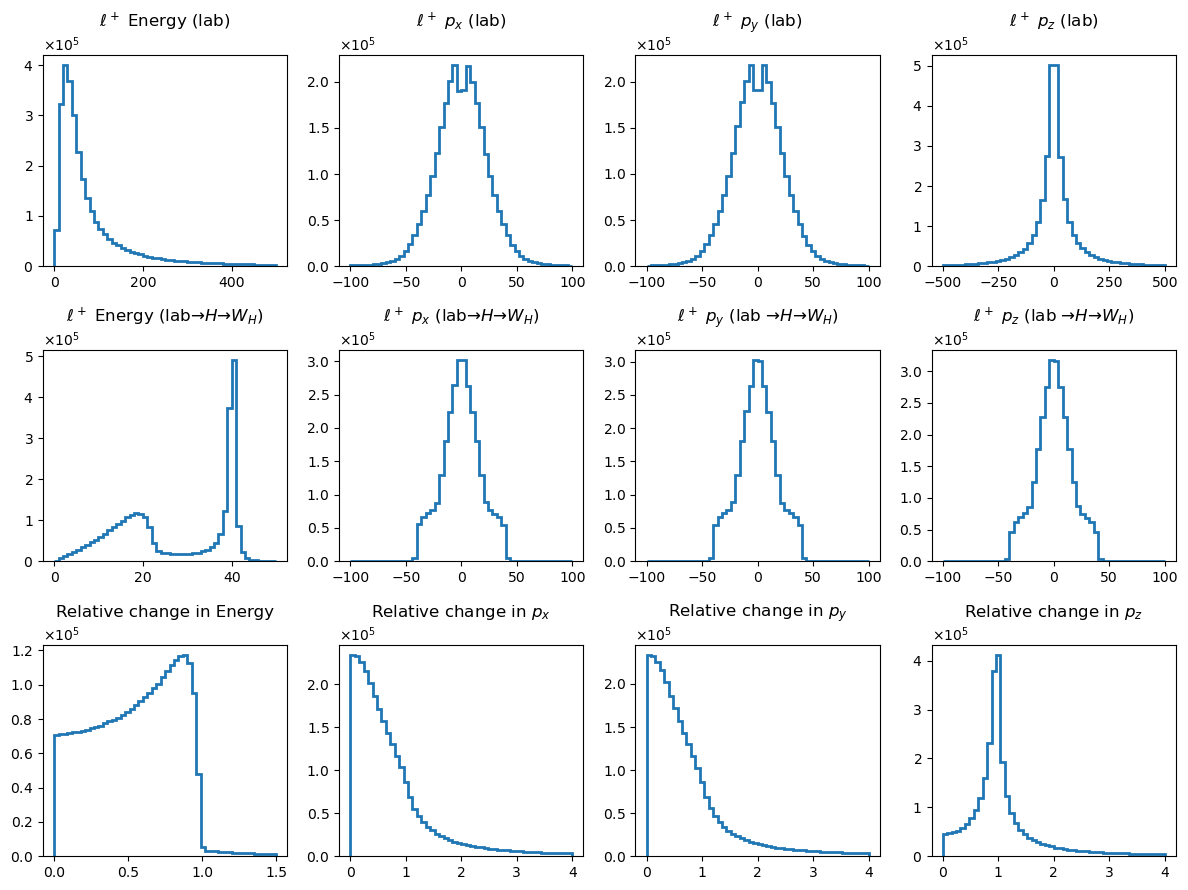

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,9),tight_layout=True)
p4 = ['E','px','py','pz']
titles=[[r'$\ell^+$ Energy (lab)',r'$\ell^+$ $p_x$ (lab)',r'$\ell^+$ $p_y$ (lab)',r'$\ell^+$ $p_z$ (lab)'],\
        [r'$\ell^+$ Energy (lab$\to H \to W_H$)',r'$\ell^+$ $p_x$ (lab$\to H \to W_H$)',r'$\ell^+$ $p_y$ (lab $\to H \to W_H$)',r'$\ell^+$ $p_z$ (lab $\to H \to W_H$)'],\
        [r'Relative change in Energy', r'Relative change in $p_x$',r'Relative change in $p_y$',r'Relative change in $p_z$']]
xranges=[ [ [0,500],[-100,100],[-100,100],[-500,500] ],\
          [ [0, 50],[-100,100],[-100,100],[-100,100] ],\
          [ [0,1.5],[0,4],[0,4],[0,4] ] ]
for i in range(4):
    ax[0,i].hist(LeptonP[p4[i]]  ,bins=50,histtype='step',lw=2,range=xranges[0][i])
    ax[1,i].hist(LeptonP[p4[i]+'_H_WH'],bins=50,histtype='step',lw=2,range=xranges[1][i])
    ax[2,i].hist(np.abs(1-LeptonP[p4[i]+'_H_WH']/LeptonP[p4[i]]),bins=50,histtype='step',lw=2,range=xranges[2][i])
    for j in range(3):
        ax[j,i].set_title(titles[j][i],pad=20)
        ax[j,i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

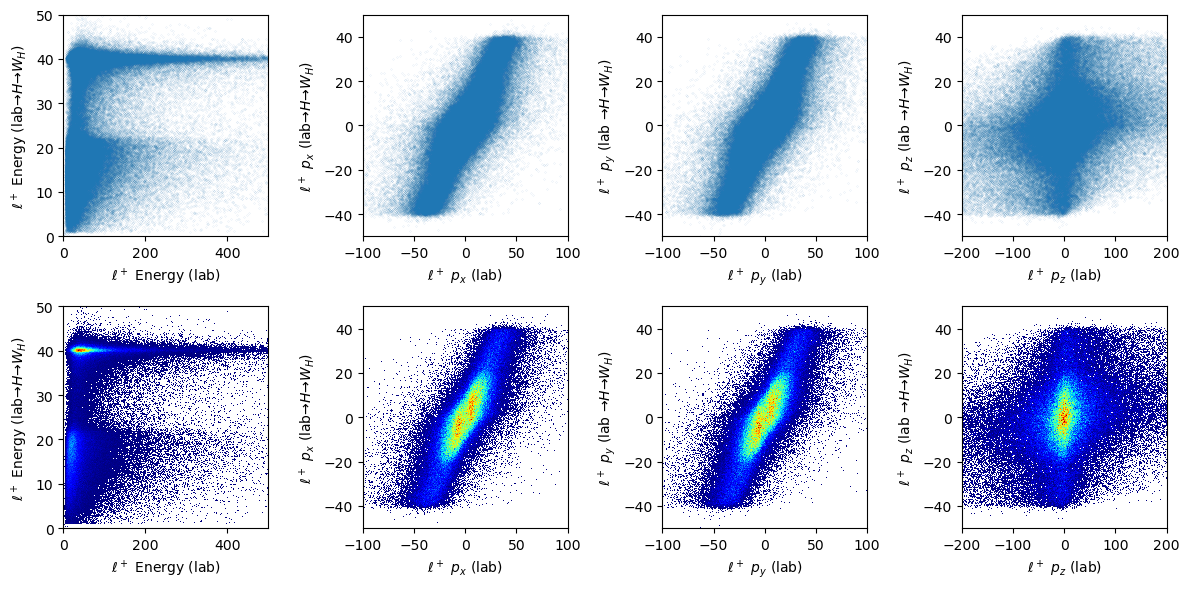

In [12]:
tot_evt = len(LeptonP['E'])
N_evts = 200000
evts = np.random.choice(tot_evt, N_evts)
fig, ax = plt.subplots(nrows=2, ncols=4, tight_layout=True,figsize=(12,6))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
xranges=[ [ [0,500],[-100,100],[-100,100],[-200,200] ],\
          [ [0, 50],[-50,50],[-50,50],[-50,50] ] ]
for i in range(4):
    ax[0,i].scatter(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_W'][evts],s=0.002)
    #ax[0,i].scatter(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_H_WH'][evts],s=0.05)
    ax[1,i].hist2d(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_H_WH'][evts], bins=250, vmin = 1, cmap=my_cmap,range=[xranges[0][i],xranges[1][i]])
    ax[0,i].set_xlim(xranges[0][i])
    ax[0,i].set_ylim(xranges[1][i])

    for j in range(2):
        ax[j,i].set_xlabel(titles[0][i])
        ax[j,i].set_ylabel(titles[1][i])


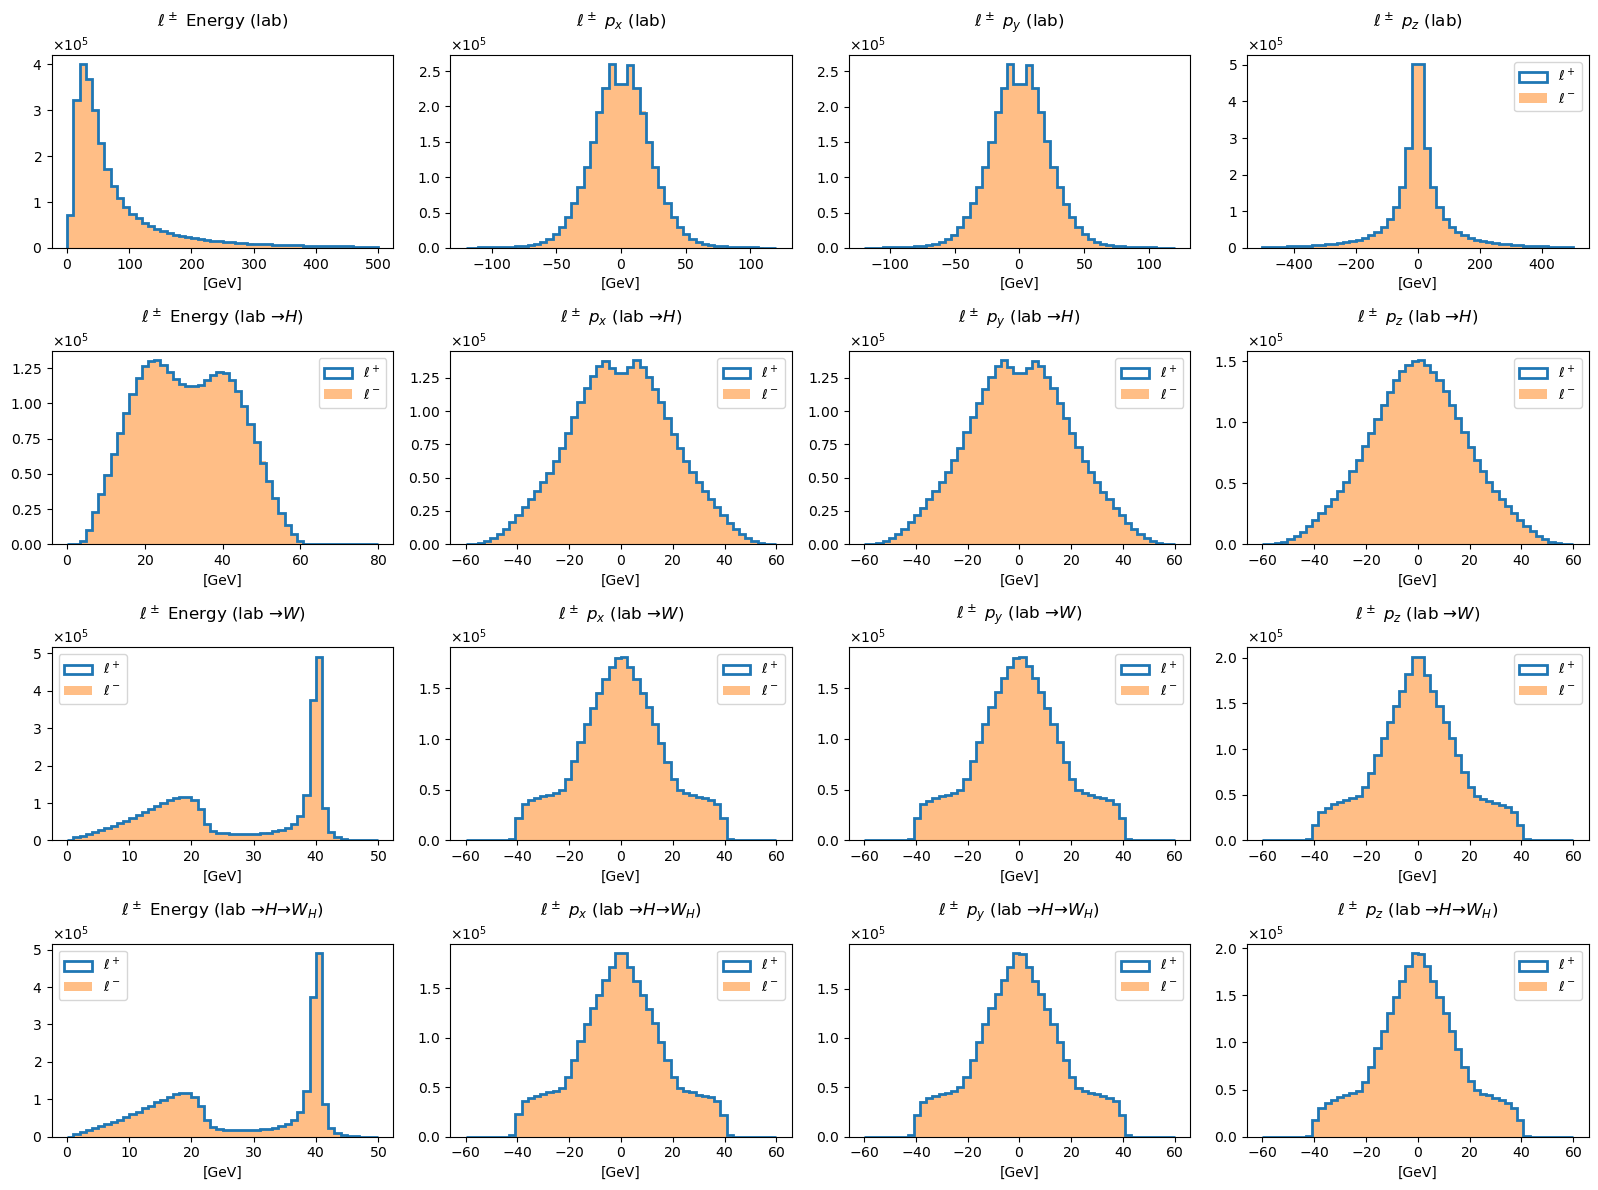

In [13]:
fig, ax = plt.subplots(nrows=4, ncols =4, figsize=(16,12))

ref_frame = [r' (lab)',r' (lab $\to H$)',r' (lab $\to W$)',r' (lab $\to H \to W_H$)']
component = [' Energy',' $p_x$',' $p_y$',' $p_z$']
p4 = ['E','px','py','pz']
rf = ['','_H','_W','_H_WH']
xrange = [[ [0,500],[-120,120],[-120,120],[-500,500] ],\
          [ [0, 80],[-60,60],[-60,60],[-60,60] ],\
          [ [0, 50],[-60,60],[-60,60],[-60,60] ],\
          [ [0, 50],[-60,60],[-60,60],[-60,60] ]]
for i in range(4):
    for j in range(4):
        ax[i,j].set_title(r'$\ell^\pm$'+component[j]+ref_frame[i],pad=20)
        ax[i,j].hist(LeptonP[p4[j]+rf[i]],histtype='step',bins=50,range=xrange[i][j],label=r'$\ell^+$',lw=2)
        ax[i,j].hist(LeptonM[p4[j]+rf[i]],histtype='bar' ,bins=50,range=xrange[i][j],label=r'$\ell^-$',alpha=0.5)
        ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        if( i > 0 or j > 2 ): ax[i,j].legend()
plt.tight_layout()

In [11]:
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split

In [19]:
np.random.seed(13)
tot_evt = len(LeptonP['E'])
sample_size = 100000
rng_sample = np.random.choice(tot_evt, size=sample_size)
x_train = LeptonP.iloc[rng_sample,0:4]
x_train = pd.concat([x_train,LeptonM.iloc[rng_sample,0:4]], axis=1)
y_train = LeptonP['px_H_WH'][rng_sample]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [20]:
x_train.shape

(80000, 8)

In [21]:
%%time
svr_rbf = NuSVR(kernel='rbf',C=10,gamma='scale',verbose=True)
svr_rbf.fit(x_train, y_train)

[LibSVM].....................................................................*.................*
optimization finished, #iter = 85991
epsilon = 6.147274
obj = -5100379.406193, rho = -0.694582
nSV = 40140, nBSV = 39870
CPU times: user 3min 11s, sys: 20.2 ms, total: 3min 12s
Wall time: 3min 12s


NuSVR(C=10, verbose=True)

In [29]:
y_test_pred = svr_rbf.predict(x_test)
y_train_pred= svr_rbf.predict(x_train)

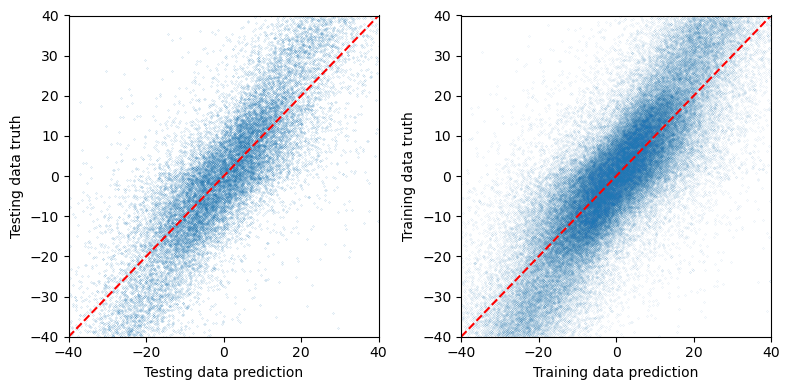

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4),tight_layout=True)
ax[0].scatter(y_test_pred, y_test, s=0.01)
ax[1].scatter(y_train_pred, y_train, s=0.0025)
ax[0].set_xlabel("Testing data prediction")
ax[1].set_xlabel("Training data prediction")
ax[0].set_ylabel("Testing data truth")
ax[1].set_ylabel("Training data truth")
for i in range(2):
    ax[i].plot([-40,40],[-40,40], ls='dashed',c='r')
    ax[i].set_xlim([-40,40])
    
    ax[i].set_ylim([-40,40])
plt.show()

In [31]:
train_rel_err= np.abs( 1 - (y_train_pred/y_train) )
test_rel_err = np.abs( 1 - (y_test_pred/y_test) )

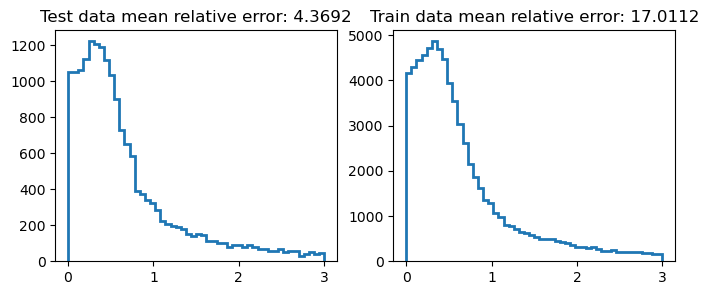

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].hist(test_rel_err, histtype='step',lw=2, bins=50,range=[0,3])
ax[1].hist(train_rel_err, histtype='step',lw=2, bins=50,range=[0,3])
ax[0].set_title("Test data mean relative error: {:.4f}".format(np.mean(test_rel_err)))
ax[1].set_title("Train data mean relative error: {:.4f}".format(np.mean(train_rel_err)))
plt.show()

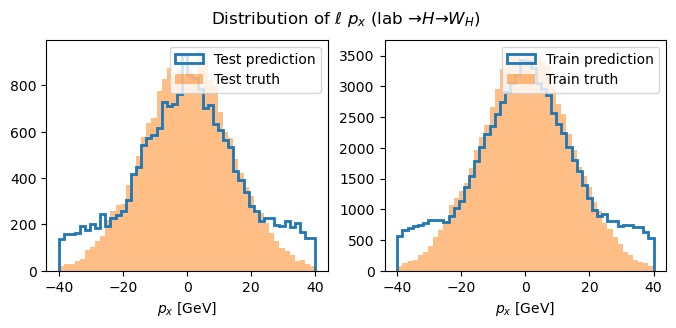

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].hist(y_test, histtype='step',lw=2, bins=50,range=[-40,40],label='Test prediction')
ax[0].hist(y_test_pred, histtype='bar',alpha=0.5, bins=50,range=[-40,40],label = 'Test truth')
ax[1].hist(y_train, histtype='step',lw=2, bins=50,range=[-40,40], label = 'Train prediction')
ax[1].hist(y_train_pred, histtype='bar',alpha=0.5, bins=50,range=[-40,40], label= 'Train truth')
plt.suptitle(r"Distribution of $\ell^+$ $p_x$ (lab $\to H \to W_H$)")
for i in range(2):
    ax[i].set_xlabel(r'$p_x$ [GeV]')
    ax[i].legend()
plt.show()